<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Linear_Programming_(LP)_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

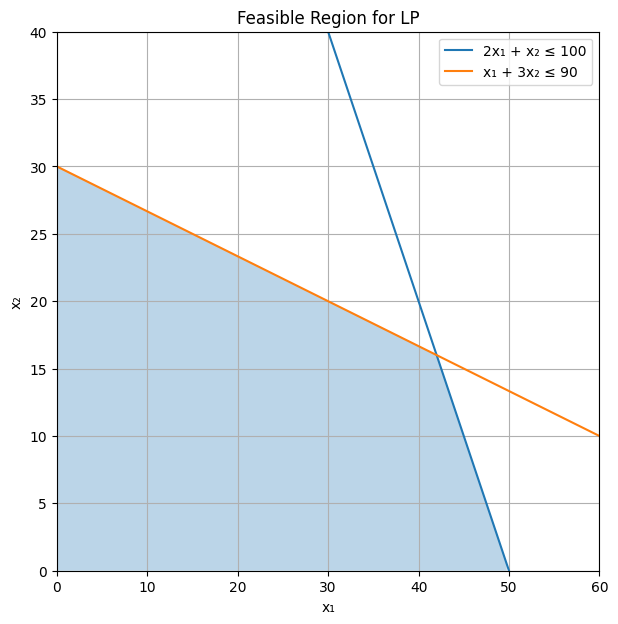

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constraints
x = np.linspace(0, 60, 200)
y1 = (100 - 2*x)
y2 = (90 - x)/3

plt.figure(figsize=(7,7))
plt.plot(x, y1, label=r'2x₁ + x₂ ≤ 100')
plt.plot(x, y2, label=r'x₁ + 3x₂ ≤ 90')
plt.fill_between(x, np.minimum(y1,y2), 0, where=(y1>=0) & (y2>=0), alpha=0.3)

plt.xlim(0,60)
plt.ylim(0,40)
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.legend()
plt.title("Feasible Region for LP")
plt.grid(True)
plt.show()

In [2]:
!pip install pulp
from pulp import LpMaximize, LpProblem, LpVariable

# Define the model
model = LpProblem("Maximize_Profit", LpMaximize)

# Decision variables
x1 = LpVariable("x1", lowBound=0)
x2 = LpVariable("x2", lowBound=0)

# Objective
model += 3*x1 + 5*x2

# Constraints
model += 2*x1 + x2 <= 100
model += x1 + 3*x2 <= 90

# Solve
status = model.solve()
print("Status:", status)
print("x1 =", x1.value())
print("x2 =", x2.value())
print("Optimal Z =", model.objective.value())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 45.1 MB/s eta 0:00:00
Status: 1
x1 = 42.0
x2 = 16.0
Optimal Z = 206.0


In [3]:
from scipy.optimize import linprog

# Maximize 3x1 + 5x2 → minimize -Z
c = [-3, -5]
A = [[2, 1],
     [1, 3]]
b = [100, 90]

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print("Optimal solution:", res.x)
print("Optimal value of Z =", -res.fun)

Optimal solution: [42. 16.]
Optimal value of Z = 206.0


In [4]:
from scipy.optimize import linprog

# Maximize 3x1 + 5x2 → minimize -Z
c = [-3, -5]
A = [[2, 1],
     [1, 3]]
b = [100, 90]

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print("Optimal solution:", res.x)
print("Optimal value of Z =", -res.fun)

Optimal solution: [42. 16.]
Optimal value of Z = 206.0


In [5]:
# Example diet problem
# Minimize cost = 20x1 + 10x2
# Subject to:  2x1 + x2 ≥ 30 (protein)
#              x1 + 2x2 ≥ 20 (vitamins)

c = [20, 10]  # costs
A = [[-2, -1],  # constraints (negated for >=)
     [-1, -2]]
b = [-30, -20]

res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print("Food quantities:", res.x)
print("Minimum cost =", res.fun)

Food quantities: [ 0. 30.]
Minimum cost = 300.0
